In [1]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns 

# 1 Import feature counts Data 

In [2]:
# Import DEG data from Rstudio output (DESeq2 analysis) 
counts = pd.read_csv('9_create_GeneCountsMatrix/gene_matrix_count.csv')

In [3]:
sex = pd.Series({'N1':'male', 'N2':'female', 'N3':'male', 'N7':'male', 'A1':'male', 'A2':'male', 'A4':'male', 'A7':'male', 'R2':'female', 'R3':'female', 'R7':'female', 'R8':'female'})
sex_binary = pd.Series({key: 0 if value == 'M' else 1 for key, value in sex.items()})

In [4]:
# reset indx and transform 
counts = counts.set_index('Geneid').T
counts['sex'] = sex_binary[counts.index]
sex = sex[counts.index]

# use standard Scaler from sklearn preprocessing to scale the data
scaler = preprocessing.StandardScaler()
X_scaled  = scaler.fit_transform(counts)

# decomposition from many components to only 2 (to be able to plot it) 
pca = PCA(n_components=2)
counts_transfomred = pca.fit_transform(X_scaled)
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.42077571 0.13440361]


In [5]:
counts_transfomred

array([[  17.39950298,   76.81032261],
       [  53.49243123, -104.45254364],
       [-159.06518094,   13.06455013],
       [-101.11788086,   11.33971911],
       [ -28.76740714,   32.76596756],
       [ 256.82050094,  143.10941364],
       [ 126.15784175,  -85.81879352],
       [-110.85072102,   41.99991861],
       [ -12.71499439,   73.76727194],
       [-248.65251213,  -26.02920203],
       [  88.31329667,  -85.44172568],
       [ 118.98512291,  -91.11489874]])

In [6]:
# convert the sample names to uniform condition names for plot legend 
def transform_index_to_number(sample:str)->int:
    """Transform the index of the counts dataframe to a number"""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'

colors = counts.index.map(transform_index_to_number)

In [7]:
counts.index

Index(['R3', 'N3', 'A7', 'A4', 'R8', 'R2', 'N7', 'A1', 'R7', 'A2', 'N2', 'N1'], dtype='object')

In [8]:
colors

Index(['Reoxygenation', 'Normoxia', 'Anoxia', 'Anoxia', 'Reoxygenation',
       'Reoxygenation', 'Normoxia', 'Anoxia', 'Reoxygenation', 'Anoxia',
       'Normoxia', 'Normoxia'],
      dtype='object')

# 2 PCA plot

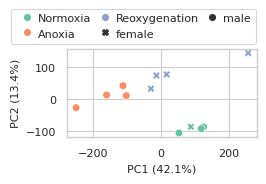

In [22]:
# PLOT 
sns.set_theme(palette = 'Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
plt.figure(figsize=((7/2.54), (5/2.54)))
g = sns.scatterplot(x=counts_transfomred[:,0], y=counts_transfomred[:,1], hue=colors, hue_order=['Normoxia', 'Anoxia', 'Reoxygenation'], s=30, style=sex.values, markers=['X', 'o'])
sns.move_legend(g,  markerscale=0.9, loc='lower right', ncol=3, bbox_to_anchor=(1, 1.05), frameon=True, columnspacing=0.2, scatteryoffsets=[0.6], handletextpad=0.01, borderaxespad=0.1)

#g.add_legend(title='', fontsize=8, loc='upper center', borderaxespad=0.1, ncol=2, bbox_to_anchor=(.33, 0.02), frameon=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.tight_layout()
# export 
plt.savefig('13_pca_plot_for_sample/PCA_sample_clustering_in_RNAseqData_plot.svg')